# Tugas Pekan 9
Oleh : Bayu Samudra - 16520420

## Impor Pustaka dan Definisi

Berikut ini adalah beberapa pustaka yang akan digunakan dalam tugas ini. Library adalah file yang berisi segala kelas yang berkaitan dengan state machine yang akan digunakan pada soal ini.

In [1]:
import library as lib
import matplotlib.pyplot as plt

### Konstanta

Berikut ini adalah konstanta Gain yang akan digunakan. `CG1` adalah konstanta gain G1 dan `CG2` adalah konstanta gain G2

In [2]:
CG1 = 420/500
CG2 = -420/250


### Fungsi Antara

Berikut ini adalah fungsi yang akan digunakan sebagai operator pada `Parallel`

In [3]:
def Adder(x,y):
    # Fungsi ini akan menerima dua bilangan x dan y, Bila
    # x bernilai None, keluarkan y, begitu pun sebaliknya.
    # Jika tidak, keluarkan hasil penjumlahan antara x dan y
    
    if(not x):
        return y
    elif(not y):
        return x
    else:
        return x + y

## Pembuatan State Machine

Berikut ini adalah rangkaian `StateMachine` bersama nama Objek yang akan dibuat:

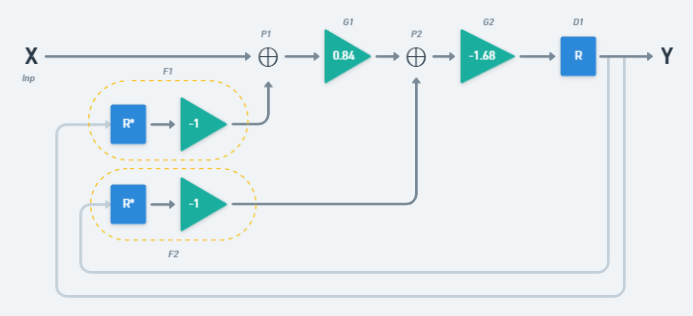

Pada gambar diatas, `R*` menandakan bahwa delay tersebut sudah termasuk di dalam objek `FeedbackCascade` secara langsung.

Berikut ini adalah proses pembuatan objek state machine:

In [4]:
# Delay
D1 = lib.Delay(0, "D1")

# Input
INP = lib.Input("INP")

# Gain
G1 = lib.Gain(CG1, "G1")
G2 = lib.Gain(CG2, "G2")

# Gain Inverter untuk Feedback (Membuat menjadi -1)
GM1 = lib.Gain(-1, "GM1")
GM2 = lib.Gain(-1, "GM2")

# Feedback Cascade
F1 = lib.FeedbackCascade(0, "F1")
F2 = lib.FeedbackCascade(0, "F2")

# Cascade jalur utama
CMAIN = lib.Cascade("CMAIN")

# Parallel Add
P1 = lib.Parallel(Adder, "P1")
P2 = lib.Parallel(Adder, "P2")


Proses ini adalah proses konfigurasi dari setiap state dan proses penyambungan antar satu state dengan state yang lain:

In [5]:

# Pembuatan Stop end pada Gain Inverter
GM1.setLastObject(lib.Input("InGM1"))
GM2.setLastObject(lib.Input("InGM2"))

# Pengaturan Feedback
F1.setTopSM(GM1)
F2.setTopSM(GM2)

# Penyambungan Parallel
P1.appendLast(INP, F2)
P2.appendLast(G1, F1)

# Penyambungan Gain
G1.setLastObject(P1)
G2.setLastObject(P2)

# Penyambungan Delay
D1.setLastObject(G2)

# Mengelompokan semua objek menjadi satu cascade
CMAIN.setTopSM(D1)
CMAIN.appendFeedback(F1, F2)

# Pembuatan Mesin Transduser
TRANS = lib.Transduser(CMAIN)

## Hasil Perhitungan

Berikut ini adalah hasil perhitungan dari state machine diatas:

In [6]:
res = TRANS.run([1]*30)

<StemContainer object of 3 artists>

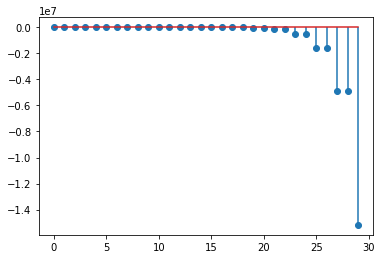

In [7]:
plt.stem(res)

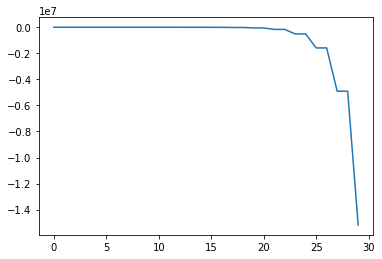

In [8]:
plt.plot(res)